In [9]:
import sys
import os
import struct
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

fpX = np.float32

import torch 
root = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(root, 'code'))
from plotting import load_fits, plot_utils, summary_plots, plot_prf_params
plot_utils.set_plotting_defaults()
from utils import roi_utils


In [10]:
subject = 1
volume_space=True
# fitting_type1 = 'gabor_solo_ridge_12ori_8sf'
# fitting_type2 = 'gabor_solo_ridge_12ori_8sf'

# fitting_type1 = 'alexnet_all_conv'
# fitting_type2 = 'alexnet_all_conv'
# fitting_type1='texture_pyramid_ridge_4ori_4sf'
# fitting_type2='texture_pyramid_ridge_4ori_4sf_pca_HL'
# fitting_type2='texture_pyramid_ridge_4ori_4sf_pca_LL_pca_HL'

fitting_type1 = 'sketch_tokens'
fitting_type2 = 'sketch_tokens'

# fitting_type2 = 'sketch_tokens_pca_max100dim'

root = os.path.dirname(os.path.dirname(os.getcwd()))
out1, fig_save_folder = load_fits.load_fit_results(subject, volume_space, fitting_type1,\
                                                   n_from_end=1, root=root, verbose=True);
load_fits.print_output_summary(out1)

out2, fig_save_folder = load_fits.load_fit_results(subject, volume_space, fitting_type2, \
                                                   n_from_end=0, root=root, verbose=True);
load_fits.print_output_summary(out2)

if not os.path.exists(fig_save_folder):
    os.makedirs(fig_save_folder)

loading from /user_data/mmhender/imStat/model_fits/S01/sketch_tokens/Nov-23-2021_2004_54/all_fit_params

dict_keys(['subject', 'volume_space', 'fitting_type', 'fitting_type2', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'which_prf_grid', 'models', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'zscore_features', 'zscore_in_groups', 'ridge', 'debug', 'up_to_sess', 'single_sess', 'shuff_rnd_seed', 'use_precomputed_prfs', 'corr_each_feature', 'discrim_each_axis', 'min_pct_var', 'max_pc_to_retain', 'use_pca_st_feats', 'use_lda_st_feats', 'lda_discrim_type'])
subject = 1
volume_space = 1
fitting_type = sketch_tokens
voxel_mask: shape (699192,)
brain_nii_shape: shape (3,)
image_order: shape (30000,)
voxel_index: len 1
voxel_roi: len 4
voxel_ncsnr: shape (699192,)
which_prf_grid = 5
models: shape (1456, 3)
best_losses: shape (19738, 1)
best_lambdas: shape (19738, 1)
best_para

In [16]:
out2['up_to_sess']

40

In [18]:
out1['lambdas']

array([0.0000000e+00, 6.4989425e-02, 5.5234134e-01, 4.2069650e+00,
       3.1612778e+01, 2.3712740e+02, 1.7782695e+03, 1.3335206e+04,
       1.0000000e+05], dtype=float32)

In [14]:
out2['which_prf_grid']

5

In [12]:
out2['use_precomputed_prfs']

True

In [19]:
fitting_type1 = 'fit prfs directly'
fitting_type2 = 'copy prfs from alexnet'
# fitting_type1 = 'gabor, grid 5'
# fitting_type2 = 'gabor, grid 6'
# fitting_type1 = 'gabor, 4 orient/4 SF'
# fitting_type2 = 'gabor, 4 orient/2 SF'

# fitting_type1 = 'sketch tokens, grid 4'
# fitting_type2 = 'sketch tokens, grid 5'
# fitting_type1 = 'gabor, no nonlin'
# fitting_type1 = 'gabor, nonlin first try'
# fitting_type2 = 'gabor, nonlin'
# fitting_type1 = 'zero-pad'
# fitting_type2 = 'reflect-pad'
# fitting_type1 = 'rect-grid'
# fitting_type2 = 'polar-grid'
# fitting_type1 = 'rect grid'
# fitting_type2 = 'polar grid'

# fitting_type1 = 'texture model, full'
# fitting_type2 = 'PCA on higher-level features'

# fitting_type1='sketch tokens'
# fitting_type2='sketch tokens w pca'

In [20]:
roi_def = roi_utils.get_combined_rois(subject,include_all=True,include_body=True,volume_space=True,verbose=False) 
skip_inds = [10,11,15,23]


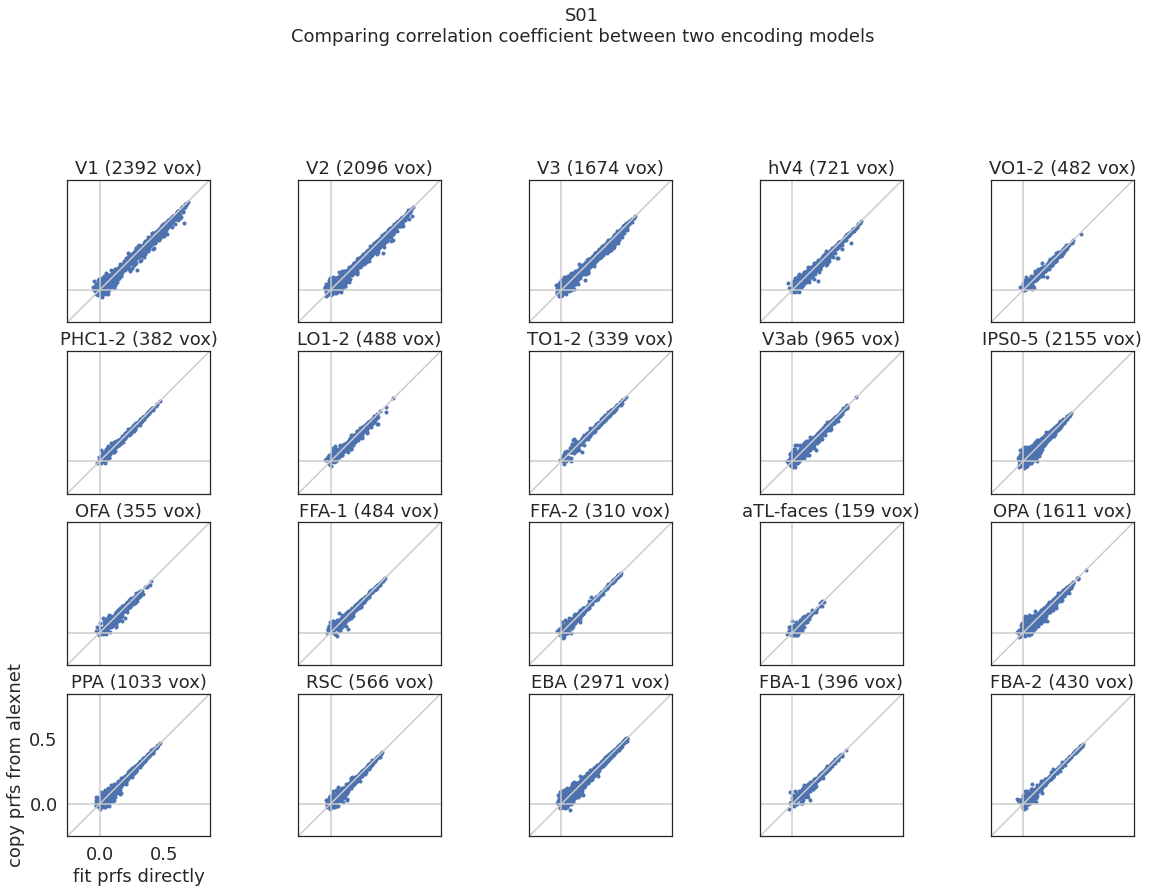

In [21]:
plot_utils.set_all_font_sizes(fs = 18)
cc_cutoff = 0.20
val_cc1 = out1['val_cc'][:,0:1]
val_cc2 = out2['val_cc'][:,0:1]
dat = np.concatenate((val_cc1,val_cc2), axis=1)

inds2use = np.ones([len(val_cc1),])==1

sp = plot_utils.scatter_plot(color=None, xlabel=fitting_type1, ylabel=fitting_type2, \
                             xlims=[-0.25, 0.85], ylims=[-0.25, 0.85], \
                  xticks=[0, 0.5], yticks=[0, 0.5],\
                  show_diagonal=True, show_axes=True);

plot_utils.create_roi_subplots(dat, inds2use, sp, subject, out1,\
                    suptitle='S%02d\nComparing correlation coefficient between two encoding models'%(subject), \
                   label_just_corner=True, figsize=(20,24), roi_def=roi_def, skip_inds=skip_inds)

plt.gcf().subplots_adjust(bottom=0.5)
# if fig_save_folder is not None:
#     plt.savefig(os.path.join(fig_save_folder,'scatter_%s_vs_%s_eachroi.pdf'%(fitting_type1, fitting_type2)))
#     plt.savefig(os.path.join(fig_save_folder,'scatter_%s_vs_%s_eachroi.png'%(fitting_type1, fitting_type2)))

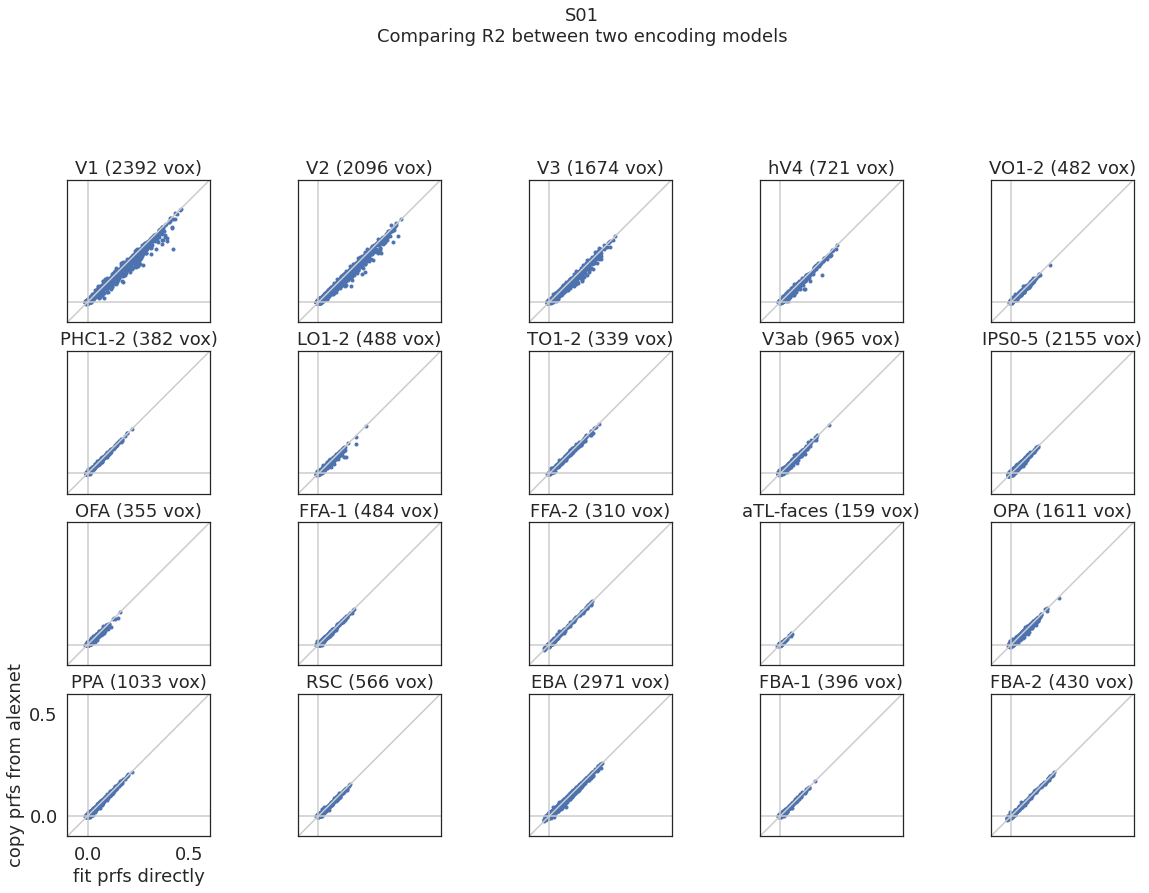

In [22]:
plot_utils.set_all_font_sizes(fs = 18)
cc_cutoff = 0.20
val_rsq1 = out1['val_r2'][:,0:1]
val_rsq2 = out2['val_r2'][:,0:1]
# val_rsq1 = out1['val_r2'][:,9:10]
# val_rsq2 = out2['val_r2'][:,9:10]
dat = np.concatenate((val_rsq1,val_rsq2), axis=1)

inds2use = np.ones([len(val_cc1),])==1

sp = plot_utils.scatter_plot(color=None, xlabel=fitting_type1, ylabel=fitting_type2, \
                             xlims=[-0.1, 0.6], ylims=[-0.1, 0.6], \
                  xticks=[0, 0.5], yticks=[0, 0.5],\
                  show_diagonal=True, show_axes=True);

plot_utils.create_roi_subplots(dat, inds2use, sp, subject, out1,\
                    suptitle='S%02d\nComparing R2 between two encoding models'%(subject), \
                   label_just_corner=True, figsize=(20,24),roi_def=roi_def, skip_inds=skip_inds)

plt.gcf().subplots_adjust(bottom=0.5)
# if fig_save_folder is not None:
#     plt.savefig(os.path.join(fig_save_folder,'scatter_%s_vs_%s_eachroi.pdf'%(fitting_type1, fitting_type2)))
#     plt.savefig(os.path.join(fig_save_folder,'scatter_%s_vs_%s_eachroi.png'%(fitting_type1, fitting_type2)))

In [31]:
out2['partial_version_names'][1]

'just_Conv1_ReLU'

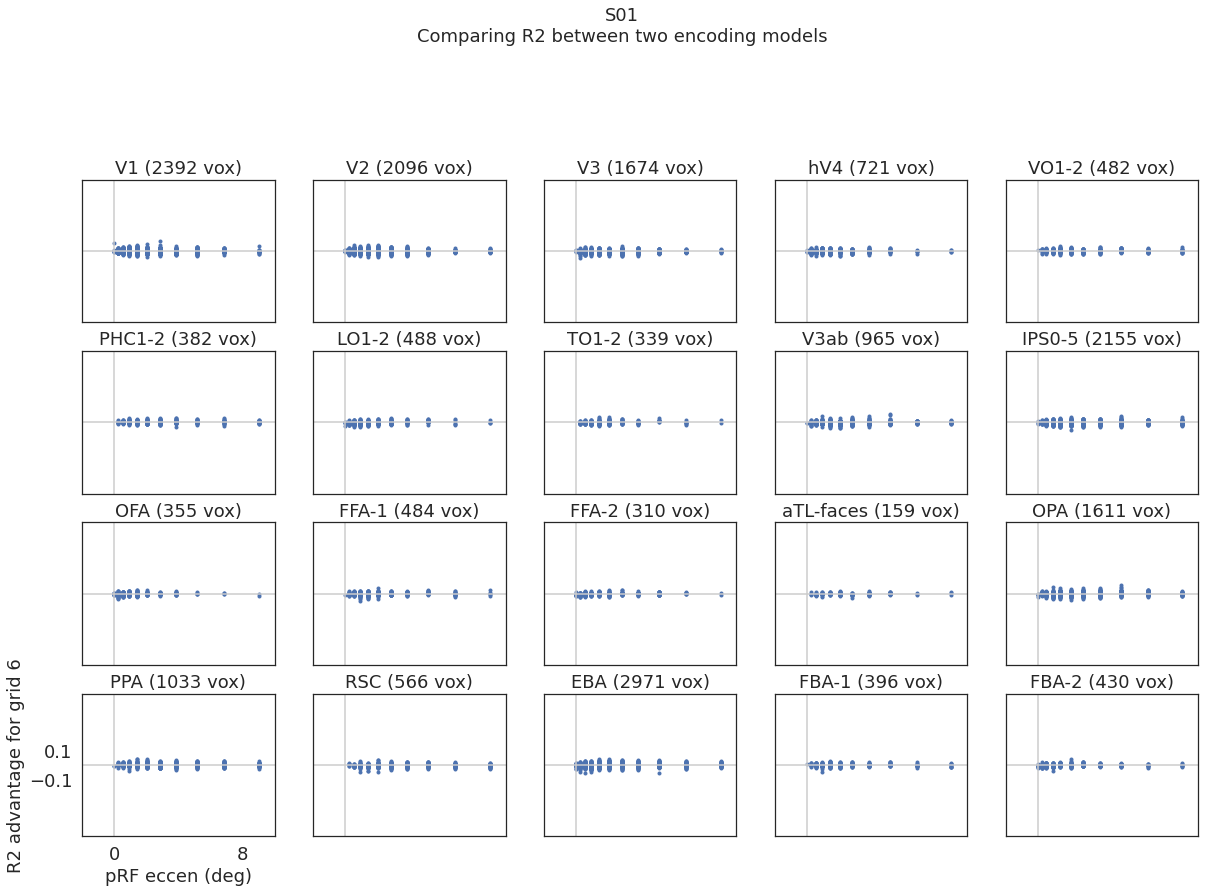

In [23]:
plot_utils.set_all_font_sizes(fs = 18)
cc_cutoff = 0.20
val_rsq1 = out1['val_r2'][:,0:1]
val_rsq2 = out2['val_r2'][:,0:1]

diff_r2 = val_rsq2-val_rsq1;

best_ecc_deg, best_angle_deg, best_size_deg = plot_prf_params.get_prf_pars_deg(out1, \
                                                                   screen_eccen_deg=8.4)

dat = np.concatenate((best_ecc_deg[:,np.newaxis],diff_r2), axis=1)

inds2use = np.ones([len(val_cc1),])==1

sp = plot_utils.scatter_plot(color=None, xlabel='pRF eccen (deg)', ylabel='R2 advantage for grid 6', \
                             xlims=[-2,10], ylims=[-0.5, 0.5], \
                  xticks=[0,8], yticks=[-.1, .1],\
                  show_diagonal=False, show_axes=True, square=False);

plot_utils.create_roi_subplots(dat, inds2use, sp, subject, out1,\
                    suptitle='S%02d\nComparing R2 between two encoding models'%(subject), \
                   label_just_corner=True, figsize=(20,24),roi_def=roi_def, skip_inds=skip_inds)

plt.gcf().subplots_adjust(bottom=0.5)
# if fig_save_folder is not None:
#     plt.savefig(os.path.join(fig_save_folder,'scatter_%s_vs_%s_eachroi.pdf'%(fitting_type1, fitting_type2)))
#     plt.savefig(os.path.join(fig_save_folder,'scatter_%s_vs_%s_eachroi.png'%(fitting_type1, fitting_type2)))

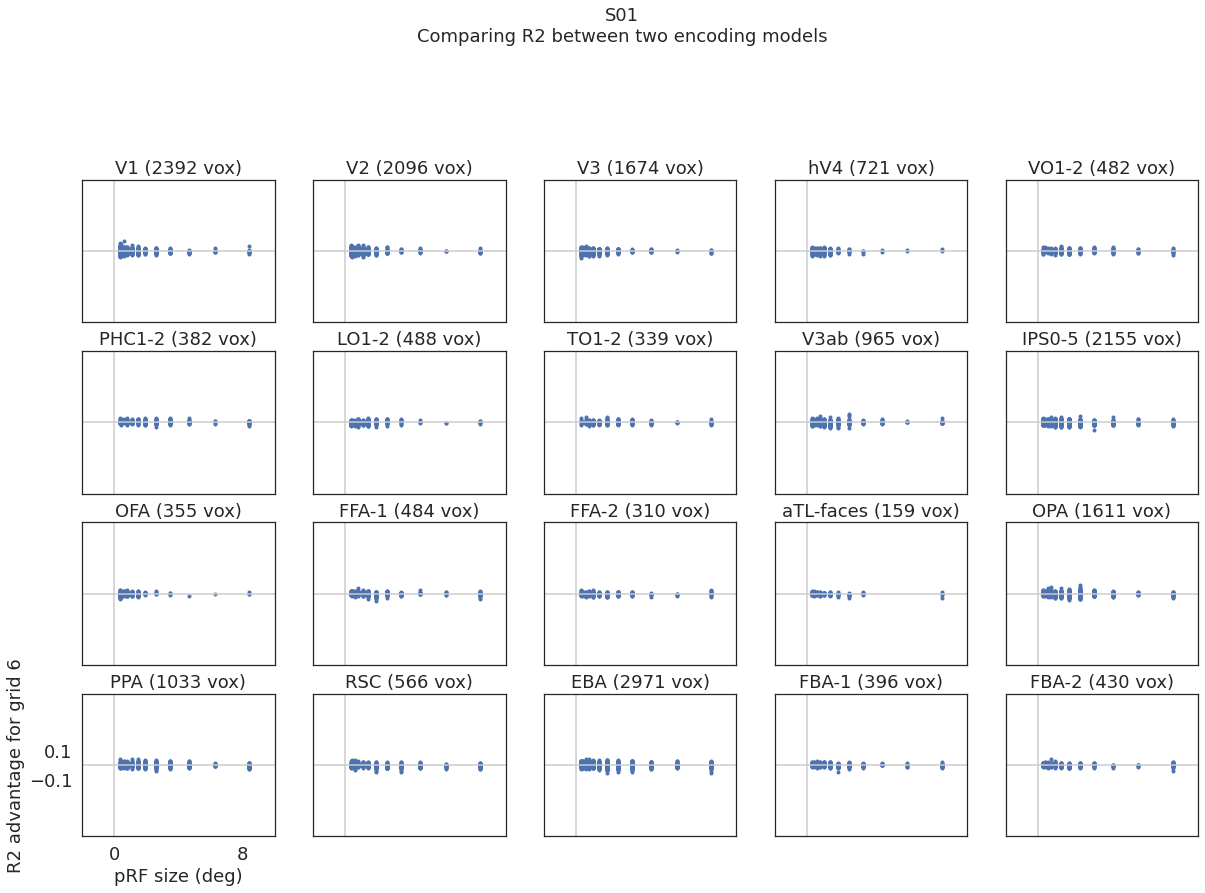

In [24]:
plot_utils.set_all_font_sizes(fs = 18)
cc_cutoff = 0.20
val_rsq1 = out1['val_r2'][:,0:1]
val_rsq2 = out2['val_r2'][:,0:1]

diff_r2 = val_rsq2-val_rsq1;

best_ecc_deg, best_angle_deg, best_size_deg = plot_prf_params.get_prf_pars_deg(out1, \
                                                                   screen_eccen_deg=8.4)

dat = np.concatenate((best_size_deg[:,np.newaxis],diff_r2), axis=1)

inds2use = np.ones([len(val_cc1),])==1

sp = plot_utils.scatter_plot(color=None, xlabel='pRF size (deg)', ylabel='R2 advantage for grid 6', \
                             xlims=[-2,10], ylims=[-0.5, 0.5], \
                  xticks=[0,8], yticks=[-.1,.1],\
                  show_diagonal=False, show_axes=True, square=False);

plot_utils.create_roi_subplots(dat, inds2use, sp, subject, out1,\
                    suptitle='S%02d\nComparing R2 between two encoding models'%(subject), \
                   label_just_corner=True, figsize=(20,24),roi_def=roi_def, skip_inds=skip_inds)

plt.gcf().subplots_adjust(bottom=0.5)
# if fig_save_folder is not None:
#     plt.savefig(os.path.join(fig_save_folder,'scatter_%s_vs_%s_eachroi.pdf'%(fitting_type1, fitting_type2)))
#     plt.savefig(os.path.join(fig_save_folder,'scatter_%s_vs_%s_eachroi.png'%(fitting_type1, fitting_type2)))

Text(0, 0.5, 'size (deg)')

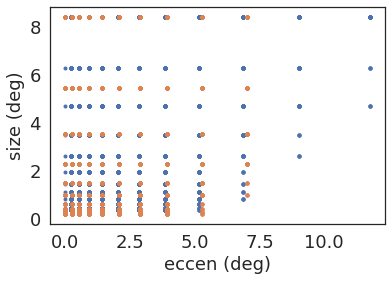

In [35]:
m1 = out1['models']
m2 = out2['models']
e1 = np.sqrt(m1[:,0]**2+m1[:,1]**2)
s1 = m1[:,2]
e2 = np.sqrt(m2[:,0]**2+m2[:,1]**2)
s2 = m2[:,2]

plt.figure();
plt.plot(e1*8.4,s1*8.4,'.')
plt.plot(e2*8.4,s2*8.4,'.')
plt.xlabel('eccen (deg)')
plt.ylabel('size (deg)')

nvox with eccen>8 deg = 10


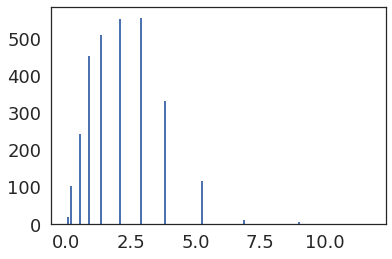

In [42]:
best_models1 = out1['best_params'][0][:,0,:]
best_ecc1 = np.sqrt(best_models1[:,0]**2+best_models1[:,1]**2)*8.4
best_size1 = best_models1[:,2]*8.4
good_vox = out1['val_r2'][:,0]>0.10

print('nvox with eccen>8 deg = %d'%np.sum(best_ecc1[good_vox]>8))

best_models2 = out2['best_params'][0][:,0,:]
best_ecc2 = np.sqrt(best_models2[:,0]**2+best_models2[:,1]**2)*8.4
best_size2 = best_models2[:,2]*8.4

plt.figure();
plt.hist(best_ecc1[good_vox],100);

In [46]:
np.max(best_size2)

8.4

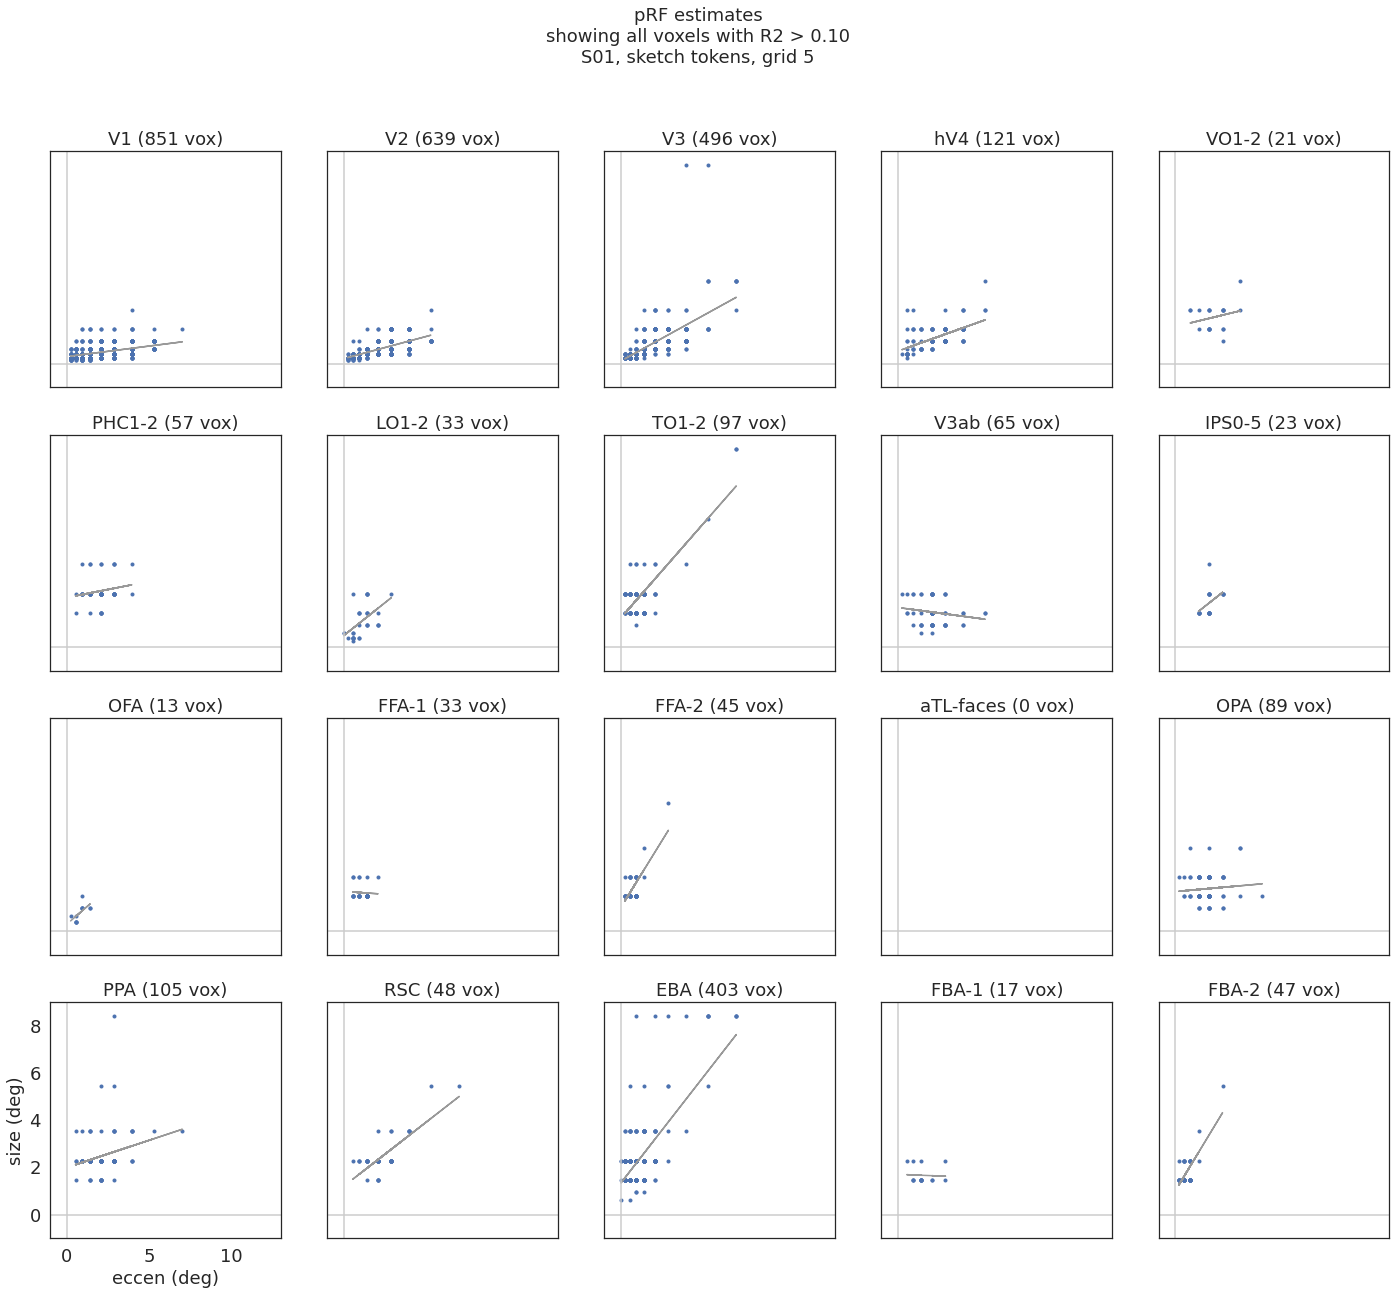

In [52]:
plot_utils.set_all_font_sizes(fs = 18)
plot_prf_params.plot_size_vs_eccen(subject, fitting_type2, out2, roi_def=roi_def, skip_inds=skip_inds, \
                                   r2_cutoff=0.10, eccen_lims = [-1, 13], size_lims = [-1,9], fig_save_folder=fig_save_folder)

In [27]:
retlabs, facelabs, placelabs, bodylabs, ret_names, face_names, place_names, body_names = roi_def    

if skip_inds is None:
    skip_inds = []
nret = len(ret_names)
nface = len(face_names)
nplace = len(place_names)
nbody = len(body_names)    
n_rois = len(ret_names) + len(face_names) + len(place_names) + len(body_names)

is_ret = np.arange(0, n_rois)<nret
is_face = (np.arange(0, n_rois)>=nret) & (np.arange(0, n_rois)<nret+nface)
is_place = (np.arange(0, n_rois)>=nret+nface) & (np.arange(0, n_rois)<nret+nface+nplace)
is_body = np.arange(0, n_rois)>=nret+nface+nplace


In [41]:
np.unique(retlabs)

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [69]:
v1_params.shape

(842, 3)

Text(0.5, 1.0, 'V1 pRF fits, sketch token model')

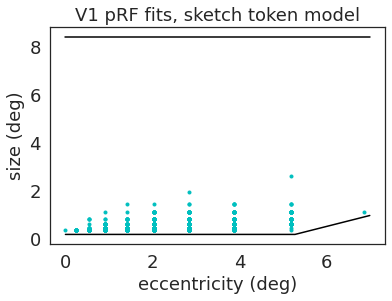

In [28]:
v1_voxels = (retlabs==0) & (out1['val_r2'][:,0]>0.10)
v1_params = out1['best_params'][0][v1_voxels,0,:]
e_v1 = np.sqrt(v1_params[:,0]**2+v1_params[:,1]**2)*8.4
s_v1 = v1_params[:,2]*8.4

prf_params = out2['models']
e_grid = np.sqrt(prf_params[:,0]**2 + prf_params[:,1]**2)*8.4
s_grid = prf_params[:,2]*8.4

un_ecc = np.unique(np.round(e_grid,2))
max_size = np.array([np.max(s_grid[np.round(e_grid,2)==un_ecc[ii]]) for ii in range(len(un_ecc))])
min_size = np.array([np.min(s_grid[np.round(e_grid,2)==un_ecc[ii]]) for ii in range(len(un_ecc))])


plt.figure();
# plt.plot(e_grid,s_grid,'.',color='k')
plt.plot(un_ecc, max_size, '-', color='k')
plt.plot(un_ecc, min_size, '-', color='k')
plt.plot()
plt.plot(e_v1,s_v1,'.',color='c')
plt.xlabel('eccentricity (deg)')
plt.ylabel('size (deg)')
plt.title('V1 pRF fits, sketch token model')

(92, 3)


Text(0.5, 1.0, 'PPA pRF fits, sketch token model')

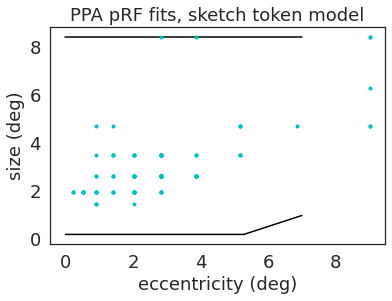

In [29]:
ppa_voxels = (placelabs==1) & (out1['val_r2'][:,0]>0.10)
ppa_params = out1['best_params'][0][ppa_voxels,0,:]
e_ppa = np.sqrt(ppa_params[:,0]**2+ppa_params[:,1]**2)*8.4
s_ppa = ppa_params[:,2]*8.4
print(ppa_params.shape)


prf_params = out2['models']
e_grid = np.sqrt(prf_params[:,0]**2 + prf_params[:,1]**2)*8.4
s_grid = prf_params[:,2]*8.4

un_ecc = np.unique(np.round(e_grid,2))
max_size = np.array([np.max(s_grid[np.round(e_grid,2)==un_ecc[ii]]) for ii in range(len(un_ecc))])
min_size = np.array([np.min(s_grid[np.round(e_grid,2)==un_ecc[ii]]) for ii in range(len(un_ecc))])


plt.figure();
# plt.plot(e_grid,s_grid,'.',color='k')
plt.plot(un_ecc, max_size, '-', color='k')
plt.plot(un_ecc, min_size, '-', color='k')
plt.plot()
plt.plot(e_ppa,s_ppa,'.',color='c')
plt.xlabel('eccentricity (deg)')
plt.ylabel('size (deg)')
plt.title('PPA pRF fits, sketch token model')

In [3]:
from plotting_and_analysis import analysis_utils, spatial_fits
import copy

retlabs, catlabs, ret_group_names, categ_group_names = analysis_utils.get_combined_rois(subject, out1)
best_ecc_deg, best_angle_deg, best_size_deg = spatial_fits.get_prf_pars_deg(out1, screen_eccen_deg=8.4)

port=33333

names0 = ['pRF eccentricity', 'pRF angle', 'pRF size']
maps0 = [best_ecc_deg, best_angle_deg, best_size_deg]
cmaps0 = ['PRGn', 'Retinotopy_RYBCR', 'PRGn']
mins0 = [0,0,0]
maxes0 = [7, 360, 4]

names1 = ['R2: %s'%fitting_type1,'R2: %s'%fitting_type2, 'model w higher R2']

val_rsq1 = copy.deepcopy(out1['val_r2'][:,0:1])
val_rsq2 = copy.deepcopy(out2['val_r2'][:,0:1])
dat = np.concatenate((val_rsq1,val_rsq2), axis=1)

max_ind = (np.argmax(dat, axis=1)+1).astype(np.float32)

bad_voxels = np.squeeze((val_rsq1<0) &  (val_rsq2<0))
val_rsq1[bad_voxels] = np.nan
val_rsq2[bad_voxels] = np.nan
max_ind[bad_voxels] = np.nan
maps1 = [np.squeeze(np.sqrt(val_rsq1)), np.squeeze(np.sqrt(val_rsq2)), max_ind]

cmaps1 = ['PuBu', 'PuBu', 'plasma_r']
mins1 = [0, 0, 0, 0, 0] 
maxes1 = [0.6, 0.6, 2]

maps = maps0+maps1
cmaps=cmaps0+cmaps1
names=names0+names1
mins=mins0+mins1
maxes=maxes0+maxes1

plot_utils.plot_maps_pycortex(maps, names, subject, out1, fitting_type1, port, cmaps=cmaps, mins=mins, maxes=maxes)

/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt


[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
Data is in 3d volume space
navigate browser to: 127.0.0.1:33333
Started server on port 33333


In [10]:
np.sum(out1['voxel_roi'][0]==1)

1180

In [42]:
out1['best_params'][0][:,0,2]

array([0.55012482, 0.05816862, 0.12301165, ..., 0.0845897 , 0.37829664,
       0.26013798])

In [10]:
val_rsq1 = out1['val_r2'][:,0:1]
val_rsq2 = out2['val_r2'][:,0:1]
dat = np.concatenate((val_rsq1,val_rsq2), axis=1)

max_ind = (np.argmax(dat, axis=1)+1).astype(np.float32)


In [34]:
models1 = out1['best_params'][0][:,0,:]
models2 = out2['best_params'][0][:,0,:]

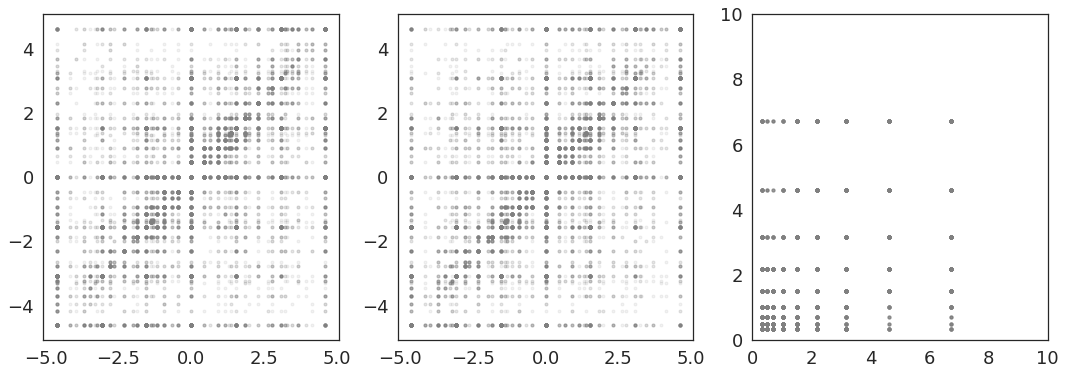

In [45]:
plt.figure(figsize=(18,6));
for ii in range(3):
    plt.subplot(1,3,ii+1)
    plt.plot(models1[:,ii]*8.4, models2[:,ii]*8.4,'.',color=[0.5, 0.5, 0.5, 0.1])
    if ii==2:
        plt.xlim([0,10])
        plt.ylim([0,10])